In [27]:
%pip install --upgrade jupyter ipywidgets
!jupyter nbextension enable --py widgetsnbextension

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml("mnist_784", version=1)


In [5]:
import numpy as np

X_train = mnist['data'].to_numpy()


def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))


In [29]:
from random import uniform
from tqdm.notebook import tqdm

class KMeans:
    def __init__(self, k: int = 5, max_iter: int = 200):
        self.k = k
        self.max_iter = max_iter

    def run(self, X):
        prev_cent = None
        min_, max_ = np.min(X, axis=0), np.max(X, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.k)]

        for it in tqdm(range(self.max_iter)):
            if not np.not_equal(self.centroids, prev_cent).any():
                break
            # Sort each data point, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.k)]
            for x in X:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_cent = self.centroids
            self.centroids = [np.mean(cluster, axis=0)
                              for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                # Catch any np.nans, resulting from a centroid having no points
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_cent[i]
        return self.centroids

    def eval(self, X, cent = None):
        if cent:
            self.centroids = cent
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return np.array(centroids), centroid_idxs


In [ ]:
kmeans = KMeans(k=5, max_iter=300)

kmeans.run(X_train)

centers, classif = kmeans.eval(X_train)


In [ ]:
from sklearn.cluster import KMeans as km

print(X_train.shape)

km_sk = km(5, max_iter=200)

km_sk.fit(X_train)

(70000, 784)


KMeans(max_iter=200, n_clusters=5)

In [ ]:
pred = km_sk.cluster_centers_
# print(np.array(kmeans.centroids).shape)
print(pred.shape)
# delta = (pred-np.array(kmeans.centroids))
with np.printoptions(threshold=np.inf):
    # print(delta)
    print(km_sk.labels_)
    print(X_train[0].shape)
    print(X_train[0])


(5, 784)
[2 4 1 0 1 3 0 2 0 1 2 0 2 3 0 1 3 0 0 0 1 4 0 0 0 2 1 2 1 0 0 0 3 0 2 0 3
 4 1 3 0 2 0 0 0 1 2 0 2 2 2 4 1 0 1 1 4 1 1 0 3 0 3 4 3 0 3 0 4 2 0 1 0 3
 2 4 2 0 0 0 2 4 3 3 1 2 2 1 4 1 3 1 1 3 0 4 1 2 2 0 0 1 0 1 0 0 3 2 4 3 1
 2 0 0 4 1 1 3 4 4 2 4 3 1 0 2 3 3 0 3 2 1 0 1 2 2 2 0 2 1 0 0 1 3 2 0 3 3
 1 2 0 3 0 0 1 3 4 2 1 3 2 2 1 1 1 3 1 1 0 2 1 3 1 0 0 0 1 0 3 2 0 1 2 1 0
 1 3 3 2 3 3 0 4 1 1 1 1 0 2 3 0 0 0 2 3 0 4 1 0 4 2 0 0 3 1 2 2 1 3 2 2 3
 3 1 1 2 1 1 1 4 1 0 3 3 4 2 2 1 3 0 0 3 2 1 2 2 2 1 0 4 1 0 0 3 2 2 0 1 1
 0 0 3 3 1 1 2 2 1 1 0 0 1 1 0 0 1 0 3 3 2 1 2 1 4 2 1 3 0 1 1 0 2 1 4 3 0
 4 1 2 3 0 1 3 4 1 1 4 1 3 0 0 3 2 1 1 0 2 3 0 1 4 2 1 3 1 3 4 2 2 1 2 3 2
 2 1 0 1 1 1 3 1 2 1 0 1 0 2 3 2 1 1 0 2 1 1 0 2 0 0 4 0 2 1 1 1 3 0 3 0 1
 0 1 1 1 1 3 2 1 3 1 3 3 0 1 1 3 2 1 0 1 2 3 2 0 0 3 2 0 0 4 3 3 1 0 2 2 0
 0 0 1 3 1 0 1 3 0 0 0 0 1 1 3 0 1 1 2 1 4 1 4 3 3 3 2 1 4 1 0 1 0 4 1 1 0
 0 2 1 0 3 3 0 4 2 4 0 0 0 3 4 1 1 1 4 0 4 3 0 1 1 1 0 1 0 4 2 0 1 3 1 2 2
 1 1 1 0 3 2 1 3

In [30]:
from skimage import io
import numpy as np
from tqdm.notebook import tqdm

class Compressor:
    def __init__(self, size = 64):
        self.size = size
        self.kmeans = None
        self.centers = None

    def Compress(self, imgarr = None, imgpath: str = None, outpath: str = None):
        #Read the image
        image = io.imread(imgpath) if imgpath else imgarr
        with np.printoptions(threshold=np.inf):
            print(image.shape)
            # print(image)
        # io.imshow(image)
        # io.show()

        #Dimension of the original image
        rows = image.shape[0]
        cols = image.shape[1]

        #Flatten the image
        image = image.reshape(rows*cols, 3)

        print("kmeans start")
        #Implement k-means clustering to form k clusters
        self.kmeans = KMeans(k=self.size, max_iter=300)
        self.centers = self.kmeans.run(image)
        print("kmeans eval")

        _, labels_ = self.kmeans.eval(image)

        print(labels_)
        labels_ = np.array(labels_).reshape(rows, cols)

        if outpath:
            io.imsave(outpath, labels_)

        return labels_, self.centers

    def Decompress(self, imgarr = None, imgpath: str = None, outpath: str = None, cent = None):
        #         print("compressed")

        # #Replace each pixel value with its nearby centroid
        # # compressed_image = kmeans.centroids[labels_]
        # compressed_image = np.array(compressed_image)
        # print(compressed_image)
        # print(compressed_image.shape)
        # compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
        # print(compressed_image.shape)

        # #Reshape the image to original dimension
        # compressed_image = compressed_image.reshape(rows, cols, 3)

        # #Save and display output image
        
        # io.imshow(compressed_image)
        # io.show()
        # return compressed_image
        #Read the image
        if cent:
            self.centers = cent
        image = io.imread(imgpath) if imgpath else imgarr
        with np.printoptions(threshold=np.inf):
            print(image.shape)
            # print(image)
        # io.imshow(image)
        # io.show()

        #Dimension of the original image
        rows = image.shape[0]
        cols = image.shape[1]

        new = np.zeros((rows, cols, 3), dtype=np.uint8)
        self.centers = np.array(self.centers)
        print(self.centers.shape)
        for i in tqdm(range(rows)):
            for j in range(cols):
                index = image[i, j]
                new[i, j, :] = self.centers[index, :]
        io.imshow(new)
        io.show()

        if outpath:
            io.imsave(outpath, new)

        return new


In [31]:
comp = Compressor(12)

# X_train[12]

lbl, cent = comp.Compress(imgpath="images.jpeg", outpath = 'images_12.jpeg')

(225, 225, 3)
kmeans start


  0%|          | 0/300 [00:00<?, ?it/s]

/home/osmonoz/anaconda3/envs/tf-gpu-cuda8/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/osmonoz/anaconda3/envs/tf-gpu-cuda8/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


kmeans eval


/tmp/ipykernel_276095/2565063994.py:39: UserWarning: images_12.jpeg is a low contrast image
  io.imsave(outpath, labels_)
Lossy conversion from int64 to uint8. Range [0, 11]. Convert image to uint8 prior to saving to suppress this warning.


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 5, 5, 5, 5, 11, 3, 8, 2, 2, 2, 8, 3, 10, 10, 10, 0, 4, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 4, 4, 4, 11, 0, 0, 11, 4, 4, 4, 5, 5, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7, 4, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 11, 5, 5, 5, 5, 9, 9, 5, 10, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 10, 1, 1, 1, 1, 3, 3, 7, 7, 7, 0, 0, 0, 11, 11, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 0, 3, 3, 7, 1, 10, 1, 3, 3, 7, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 4, 5, 5, 5, 5, 11, 7, 3, 2, 2, 3, 3, 10, 10, 0, 0, 11, 4, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 4, 4, 4, 11, 0, 0, 11, 4, 5, 5, 4, 4, 3, 3, 2, 2, 

[[ 1  1  1 ...  4  4  5]
 [ 1  1  1 ...  4  4  5]
 [ 1  1  1 ...  4  4  5]
 ...
 [ 7  7 11 ...  9  5  9]
 [ 7  3 11 ...  9  9  9]
 [ 7  7  7 ...  9  9  9]]
(225, 225)
(12, 3)


  0%|          | 0/225 [00:00<?, ?it/s]

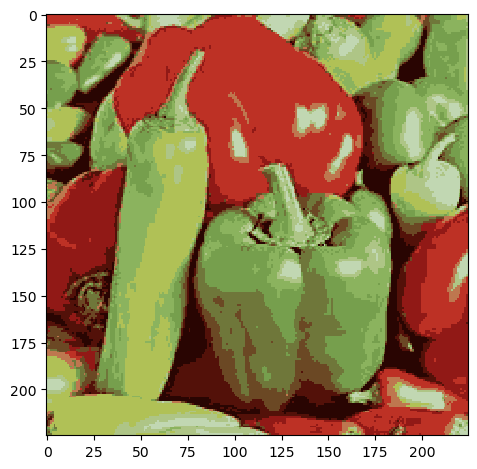

array([[[189,  49,  37],
        [189,  49,  37],
        [189,  49,  37],
        ...,
        [176, 193,  86],
        [176, 193,  86],
        [174, 197, 134]],

       [[189,  49,  37],
        [189,  49,  37],
        [189,  49,  37],
        ...,
        [176, 193,  86],
        [176, 193,  86],
        [174, 197, 134]],

       [[189,  49,  37],
        [189,  49,  37],
        [189,  49,  37],
        ...,
        [176, 193,  86],
        [176, 193,  86],
        [174, 197, 134]],

       ...,

       [[111, 119,  58],
        [111, 119,  58],
        [139, 179,  94],
        ...,
        [193, 215, 178],
        [174, 197, 134],
        [193, 215, 178]],

       [[111, 119,  58],
        [107,  72,  36],
        [139, 179,  94],
        ...,
        [193, 215, 178],
        [193, 215, 178],
        [193, 215, 178]],

       [[111, 119,  58],
        [111, 119,  58],
        [111, 119,  58],
        ...,
        [193, 215, 178],
        [193, 215, 178],
        [193, 215, 178]]

In [32]:
comp = Compressor(8)

print(lbl)

comp.Decompress(imgarr=lbl, outpath = 'images_12_decomp.jpeg', cent=cent)